Christabel Membere - 01703600

## Moving standard deviation analysis
*In this notebook, I use ROC curves to graphically display the accuracy of moving standard deviation within Nanopore app delay classification model.*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

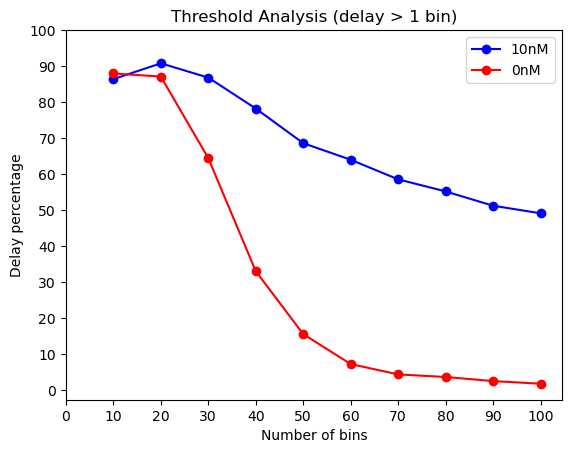

In [3]:
#Graphs to justify use of 75 bins, delay > 10 bins as TP to train Nanopore app model 
x = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
y1_data = [86.4, 90.79, 86.82, 78.24, 68.62, 64.02, 58.58, 55.23, 51.26, 49.16]
y2_data = [87.97, 87.11, 64.47, 33.09, 15.62, 7.31, 4.44, 3.72, 2.58, 1.86]

fig, ax = plt.subplots()

ax.plot(x, y1_data, label='10nM', marker='o', color='blue')
ax.plot(x, y2_data, label='0nM', marker='o', color='red')

ax.set_xlabel('Number of bins')
ax.set_ylabel('Delay percentage')
ax.set_xticks(range(0, 101, 10))
ax.set_yticks(range(0, 101, 10))
ax.set_title('Threshold Analysis (delay > 1 bin)')
ax.legend()

plt.savefig('thresh1.png', format='png')
plt.show()

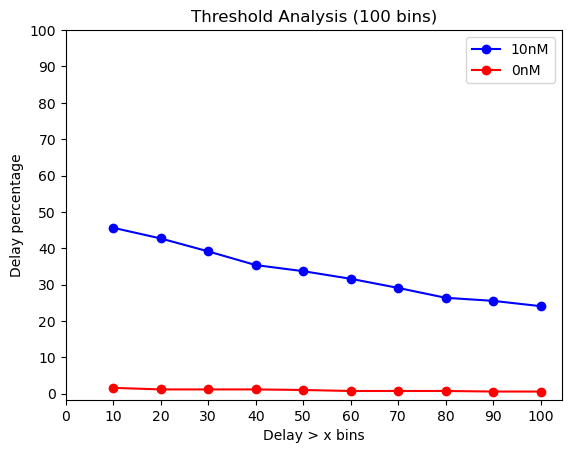

In [7]:
#Graphs to justify use of 75 bins, delay > 10 bins as TP to train Nanopore app model 
x = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
y1_data = [45.61, 42.68, 39.12, 35.36, 33.68, 31.59, 29.08, 26.36, 25.52, 24.06]
y2_data = [1.58, 1.15, 1.15, 1.15, 1.00, 0.72, 0.72, 0.72, 0.57, 0.57]

fig, ax = plt.subplots()

ax.plot(x, y1_data, label='10nM', marker='o', color='blue')
ax.plot(x, y2_data, label='0nM', marker='o', color='red')

ax.set_xlabel('Delay > x bins')
ax.set_ylabel('Delay percentage')
ax.set_xticks(range(0, 101, 10))
ax.set_yticks(range(0, 101, 10))
ax.set_title('Threshold Analysis (100 bins)')
ax.legend()

plt.savefig('thresh2.png', format='png')
plt.show()

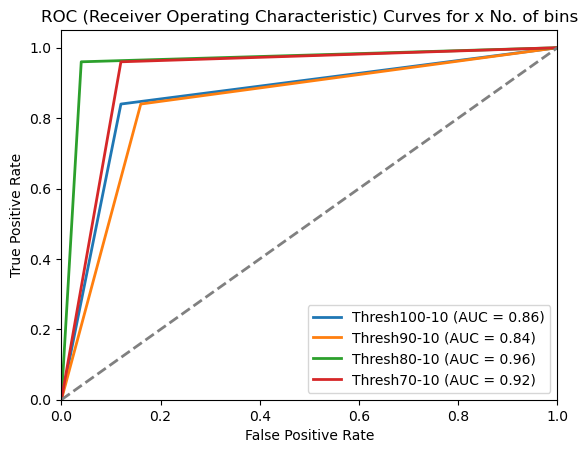

<Figure size 640x480 with 0 Axes>

In [8]:
#True positive labels for events 1-50
y_true_events = np.arange(1, 51)
y_true = np.isin(y_true_events, np.array([1, 2, 3, 5, 6, 8, 11, 12, 13, 16, 18, 20, 24, 28, 29, 30, 31, 33, 35, 36, 38, 41, 42, 44, 48])).astype(int)

#Different delay predicted events for each threshold pair
datasets = {
    'Thresh100-10': np.array([1, 2, 5, 6, 8, 11, 12, 13, 16, 18, 20, 24, 27, 28, 30, 31, 33, 35, 37, 38, 40, 41, 42, 48]),
    'Thresh90-10': np.array([1, 2, 5, 8, 11, 12, 13, 16, 18, 20, 24, 27, 28, 30, 31, 33, 35, 36, 37, 38, 40, 41, 42, 48, 49]),
    'Thresh80-10': np.array([1, 2, 5, 6, 8, 11, 12,	13,	16,	18,	20,	24,	28,	29,	30,	31,	33,	35,	36,	38,	40,	41,	42,	44,	48]),
    'Thresh70-10': np.array([1, 2, 3, 5, 6,	8, 11, 12, 13, 18, 20, 24, 27, 28, 29, 30, 31, 33, 35, 36, 37, 38, 41, 42, 44, 48, 49])
}

#Convert predicted events to binary arrays
for key in datasets:
    predicted_events = datasets[key]
    datasets[key] = np.isin(y_true_events, predicted_events).astype(int)

#Compute ROC curve and AUC for each dataset
fpr = {}
tpr = {}
roc_auc = {}

for key in datasets:
    y_scores = datasets[key]
    fpr[key], tpr[key], _ = roc_curve(y_true, y_scores)
    roc_auc[key] = auc(fpr[key], tpr[key])

# Plot ROC curves for all datasets
plt.figure()
lw = 2

for key in datasets:
    plt.plot(fpr[key], tpr[key], lw=lw, label=f'{key} (AUC = {roc_auc[key]:0.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC (Receiver Operating Characteristic) Curves for x No. of bins')
plt.legend(loc="lower right")
plt.show()
plt.savefig('roc.png', format='png')

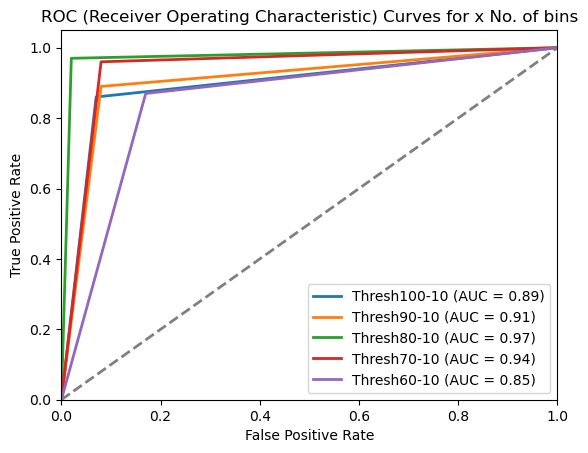

In [6]:
#True positive labels for events 1-200 for more accurate data interpretation
y_true_events = np.arange(1, 201)
y_true = np.isin(y_true_events, np.array([1, 2, 3, 5, 6, 8, 11, 12, 13, 16, 18, 20, 24, 28, 29, 30, 31, 33, 35, 36, 38, 41, 42, 44, 48, 52, 57, 59, 60, 62, 63, 64, 65, 68, 69, 70, 72, 73, 74, 76, 83, 84, 85, 87, 88, 89, 90, 92, 93, 94, 95, 98, 101, 103, 108, 110, 112, 116, 117, 118, 119, 120, 122, 124, 127, 133, 135, 138, 139, 140, 143, 145, 146, 147, 148, 149, 152, 154, 155, 156, 158, 160, 161, 162, 163, 168, 169, 171, 172, 173, 176, 178, 182, 183, 189, 190, 191, 192, 193, 195])).astype(int)

#Different predicted events for each threshold pair
datasets = {
    'Thresh100-10': np.array([1, 2, 5, 6, 8, 11, 12, 13, 16, 18, 20, 24, 27, 28, 30, 31, 33, 35, 37, 38, 40, 41, 42, 48, 52, 56, 57, 59, 60, 62, 63, 64, 65, 68, 69, 70, 73, 74, 76, 83, 84, 85, 87, 88, 89, 90, 92, 93, 94, 95, 103, 108, 110, 112, 116, 118, 119, 120, 124, 127, 133, 134, 135, 138, 140, 143, 146, 147, 148, 149, 152, 154, 155, 156, 158, 160, 161, 162, 163, 168, 169, 171, 173, 176, 178, 182, 183, 187, 190, 192, 193, 194, 195]),
    'Thresh90-10': np.array([1, 2, 5, 8, 11, 12, 13, 16, 18, 20, 24, 27, 28, 30, 31, 33, 35, 36, 37, 38, 40, 41, 42, 48, 49, 52, 56, 57, 59, 60, 62, 63, 64, 65, 68, 69, 70, 72, 73, 74, 76, 83, 84, 85, 87, 88, 89, 90, 92, 93, 94, 95, 103, 108, 110, 112, 116, 117, 118, 119, 120, 124, 127, 133, 134, 135, 138, 140, 143, 145, 146, 147, 148, 149, 152, 154, 156, 158, 160, 161, 163, 168, 169, 171, 172, 173, 176, 178, 182, 183, 187, 190, 191, 192, 193, 194, 195]),
    'Thresh80-10': np.array([1, 2, 5, 6, 8, 11, 12, 13, 16, 18, 20, 24, 28, 29, 30, 31, 33, 35, 36, 38, 40, 41, 42, 44, 48, 52, 57, 59, 60, 62, 63, 64, 65, 68, 69, 70, 72, 73, 74, 76, 83, 84, 85, 87, 88, 89, 90, 92, 93, 94, 95, 98, 103, 108, 110, 112, 116, 117, 118, 119, 120, 122, 124, 127, 133, 134, 138, 139, 140, 143, 145, 146, 147, 148, 149, 152, 154, 155, 156, 158, 160, 161, 162, 163, 168, 169, 171, 172, 173, 176, 178, 182, 183, 189, 190, 191, 192, 193, 195]),
    'Thresh70-10': np.array([1, 2, 3, 5, 6, 8, 11, 12, 13, 18, 20, 24, 27, 28, 29, 30, 31, 33, 35, 36, 37, 38, 41, 42, 44, 48, 49, 52, 56, 57, 59, 60, 62, 63, 64, 65, 68, 69, 70, 73, 74, 76, 83, 84, 85, 87, 88, 89, 90, 92, 93, 94, 95, 98, 101, 103, 108, 110, 112, 116, 117, 118, 119, 120, 122, 124, 127, 133, 135, 138, 139, 140, 143, 144, 145, 146, 147, 148, 149, 154, 155, 156, 160, 161, 162, 163, 168, 169, 171, 172, 173, 174, 176, 178, 182, 183, 187, 189, 190, 191, 192, 193, 194, 195]),
    'Thresh60-10': np.array([1, 2, 3, 5, 6, 8, 11, 13, 14, 16, 18, 24, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 40, 41, 42, 44, 48, 49, 52, 56, 59, 60, 62, 63, 64, 65, 68, 70, 72, 73, 74, 76, 83, 84, 87, 88, 89, 90, 92, 93, 94, 95, 98, 101, 108, 110, 111, 116, 117, 118, 119, 120, 124, 125, 132, 133, 134, 135, 138, 140, 143, 144, 145, 146, 147, 148, 149, 151, 152, 154, 155, 156, 158, 160, 162, 163, 165, 168, 169, 172, 173, 174, 176, 178, 182, 183, 187, 189, 190, 191, 192, 193, 194, 195])
}

#Convert predicted events to binary arrays
for key in datasets:
    predicted_events = datasets[key]
    datasets[key] = np.isin(y_true_events, predicted_events).astype(int)

#Compute ROC curve and AUC for each dataset
fpr = {}
tpr = {}
roc_auc = {}

for key in datasets:
    y_scores = datasets[key]
    fpr[key], tpr[key], _ = roc_curve(y_true, y_scores)
    roc_auc[key] = auc(fpr[key], tpr[key])

# Plot ROC curves for all datasets
plt.figure()
lw = 2

for key in datasets:
    plt.plot(fpr[key], tpr[key], lw=lw, label=f'{key} (AUC = {roc_auc[key]:0.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC (Receiver Operating Characteristic) Curves for x No. of bins')
plt.legend(loc="lower right")

plt.savefig('ROC.png', format='png')
plt.show()